## 💻 Sistema de Recomendación de Anime  - [Abstracto - motivación y audicencia]
---
<p align="center">
<img src="https://i.pinimg.com/736x/c7/71/3d/c7713d2b436d65ea99548891fbc580fe.jpg"
height = "400">
</p>

El siguiente estudio tiene como objetivo presentar un **dataset de animes** recolectado para ser utilizado en un sistema de recomendación. El dataset contiene información sobre _diferentes títulos de anime, incluyendo géneros, año de lanzamiento, calificaciones y reseñas de los usuarios_.

Este dataset fue recolectado a través de varias fuentes en línea, incluyendo sitios web de anime y plataformas de calificación de usuarios. También se han incluido detalles sobre los creadores y productora de cada título.

La información del dataset está compuesta por datos sobre las preferencias de unos 73000 usuarios entre unos 12300 animes aproximadamente.

El sistema de recomendación se basará en la información contenida en el dataset, utilizando técnicas de aprendizaje automático para analizar los datos y generar recomendaciones personalizadas para los usuarios.

En general, este dataset y el sistema de recomendación basado en él, ofrecerá a los usuarios la posibilidad de descubrir nuevos animes que puedan interesarles, basándose en su historial de visualización y preferencias personales. Además, también podría ser utilizado por los investigadores en el campo del aprendizaje automático y la recomendación para llevar a cabo sus propias investigaciones y mejorar el rendimiento del sistema.

## ⛔ Planteamiento de la problemática 
---

Cada contenido de transmisión tiene sus propios espectadores y cada contenido tiene su calificación. Los espectadores dejan algunas buenas calificaciones para el contenido si les gusta. Pero, ¿dónde se aplica? Los espectadores pueden pasar horas desplazándose a través de cientos, a veces miles de animes que nunca encuentran un contenido que les guste. Las empresas deben recibir sugerencias basadas en sus gustos y necesidades para crear un mejor entorno de transmisión que aumente los ingresos y aumente el tiempo dedicado a un sitio web.


<p align="center">
<img src = "https://miro.medium.com/max/1456/0*0tDik0rMntblG_nL.jpg" 
height="250">
</p>

Por lo tanto, nos surge la siguiente pregunta...**qué es un sistema de recomendación?**

Es un algoritmo de aprendizaje [no supervisado](https://es.wikipedia.org/wiki/Aprendizaje_no_supervisado) (**no tiene una variable objetivo** para medir la precisión) utilizado principalmente para ayudar en la toma de decisiones del consumidor (por ej. en las compras en línea. También aparecen en aplicaciones de transmisión como [Netflix](https://www.netflix.com/), [Amazon](https://www.primevideo.com/) y otros, para ayudarlo a seleccionar un programa de televisión o película para ver a continuación... y en sitios web de periodismo o  medios de comunicación o redes sociales...para sugerir otros artículos que gusten leer, entre muchos otros usos. 
Obviamente, muchos distribuidores de productos como Amazon ya han estado utilizando algoritmos de recomendación durante bastante tiempo, pero muchos sitios más pequeños o más nuevos todavía están en necesidad. 
De allí surge la idea de producir este sistema de recomendación para Animes.

## 💡 Objetivos del Proyecto
---

1. Conocer los datos de nuestra Base de Datos.
2. Breve análisis los datos.
3. Preparación de los datos (Data Wrangling & Data Cleaning).
4. Construcción de modelo de recomendación (**filtrado colaborativo por contenido** y **similitud de coseno por knn**).

## 1️⃣ Conociendo los Datos

<p align="center">
<img src="https://c.tenor.com/GHSF-v48hVwAAAAM/anime-found.gif" height="250px" >
</p>


### 🔛 Configuración Inicial 
---
_a. Montaje Google Drive_

_b. Importación de librerías (uso general)_ 

In [1]:
# Importación de librerías
# Manipulación de Datos 
import numpy as np
import pandas as pd

# Visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pylab as pylab

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Interacción
import ipywidgets as widgets

### 📁 Cargando los Datos 
---

_fuente: [kaggle](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database)_

In [2]:
# Carga del Dataset y armado del DataFrame
path_anime = 'Datasets/anime.csv'
path_rating = 'Datasets/rating.csv'

anime_data = pd.read_csv(path_anime)
rating_data = pd.read_csv(path_rating)

# Mostramos cantidad de filas y columnas del DataSet
print('----------------------- ANIME DATA ----------------------------')
print(f'Dimensiones del DataSet: {anime_data.shape} (filas x columnas)')
print('---------------------------------------------------------------')
# Previsualización del DataFrame (info general)
print (anime_data.info())

# Mostramos cantidad de filas y columnas del DataSet
print('----------------------- RATING DATA ----------------------------')
print(f'Dimensiones del DataSet: {rating_data.shape} (filas x columnas)')
print('\n--------------------------------------------------------------')
# Previsualización del DataFrame (info general)
print (rating_data.info())

----------------------- ANIME DATA ----------------------------
Dimensiones del DataSet: (12294, 7) (filas x columnas)
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
----------------------- RATING DATA ----------------------------
Dimensiones del DataSet: (7813737, 3) (filas x columnas)

--------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 c

### 📚 Detalle de los Dataset 
---

* **anime_data**

| Nombre   | Descripción                                                                |
|----------|----------------------------------------------------------------------------|
| anime_id | id del anime (unívoco-PK)                                                  |
| name     | nombre del anime                                                           |
| genre    | lista de géneros (separados por coma) del anime                            |
| type     | movie, OVA, TV, etc                                                        |
| episodes | cantidad de episodios del anime (1 si es película)                         |
| rating   | rating promedio (máx 10) del anime                                         |
| members  | número de miembros de la comunidad que se encuentran en el grupo del anime |

* **rating_data**

| Nombre   | Descripción                                                                                             |
|----------|---------------------------------------------------------------------------------------------------------|
| user_id  | id del usuario (unívoco-PK)                                                                             |
| anime_id | anime que el usuario ha puntuado                                                                        |
| rating   | rating/puntuación otorgada por el usuario (-1 si el usuario no ha puntuado el anime - máx. valor de 10) |

### 🩹 Fusión de los dataset [Unión - merge]
---

<p align="center">
<img src = "https://screenrant.com/wp-content/uploads/2017/10/DBZ-Fusion-Goku-and-Piccolo-Featured.jpg"
height = "350">
</p>

En esta sección se unen ambos dataset para unificar la información y poder mejorar nuestro modelo posterior.

[pandas merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [3]:
# Unión de Datasets [merge]
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


## 2️⃣ Breve análisis de los Datos

<p align="center">
<img src="https://th.bing.com/th/id/R.8c426e7d09af00fd53b3cb01fbea8165?rik=XnpR9waQUTw%2fPg&pid=ImgRaw&r=0" height="200px">
</p>

### **🔟Top** animes basados en el conteo de rating (votación de usuarios)

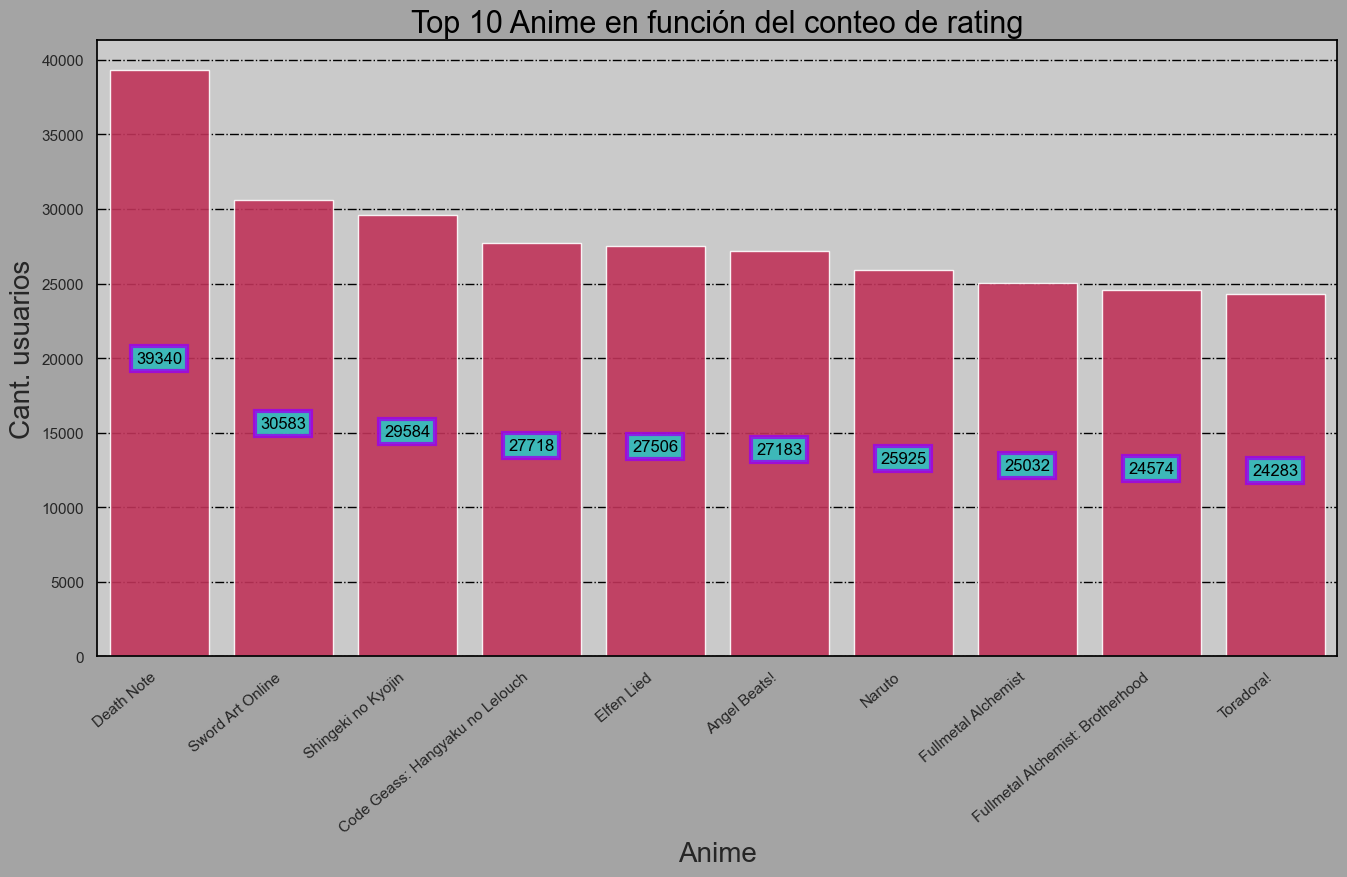

In [4]:
# Dataframe para conteo de animes por rating
combine_anime_rating = anime_fulldata.dropna(axis=0, subset=['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns={'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by='user_rating',ascending=False).head(10)

#------------------------------------- Estilo Gráficas Seaborn -------------------------------------#
sns.set(rc={'axes.facecolor':'#CACACA',
            'figure.facecolor':'#A4A4A4',
            'text.color': 'black',
            'axes.edgecolor': 'black',
            'grid.color': 'black',
            'grid.linestyle': '-.',
            })

# función paara agregar etiquetas en las barras
def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i, y[i]//2,y[i], ha = 'center',
                 bbox=dict(boxstyle='square,pad=0.3',fc='#1CD6CE',ec='#9900F0',lw=3, alpha=0.8))
#------------------------------------- Estilo Gráficas Seaborn -------------------------------------#

# Gráfica de barras con el top 10
fig,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, color='#D61C4E',alpha=0.9)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime en función del conteo de rating',fontsize=22)
ax.set_xlabel('Anime',fontsize=20) 
ax.set_ylabel('Cant. usuarios', fontsize=20)
addlabels(top10_animerating.anime_title.values,top10_animerating.user_rating.values)

**_Conclusión:_**

El podio está conformado por [Death Note](https://es.wikipedia.org/wiki/Death_Note), [SOA](https://es.wikipedia.org/wiki/Sword_Art_Online) y [Attack on Titan](https://es.wikipedia.org/wiki/Shingeki_no_Kyojin).

### 🔟**Top** animes basados en su comunidad (cantidad de Miembros)
---

In [5]:
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on='anime_title', right_on='anime_title', how='left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x':'user_rating', 'user_rating_y':'totalratingcount'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1,2199


In [6]:
# Realizamos una copia de nuestro df y eliminamos títulos duplicados 
anime_cp=anime_fulldata.copy()
anime_cp.drop_duplicates(subset="anime_title", 
                     keep='first', inplace=True)

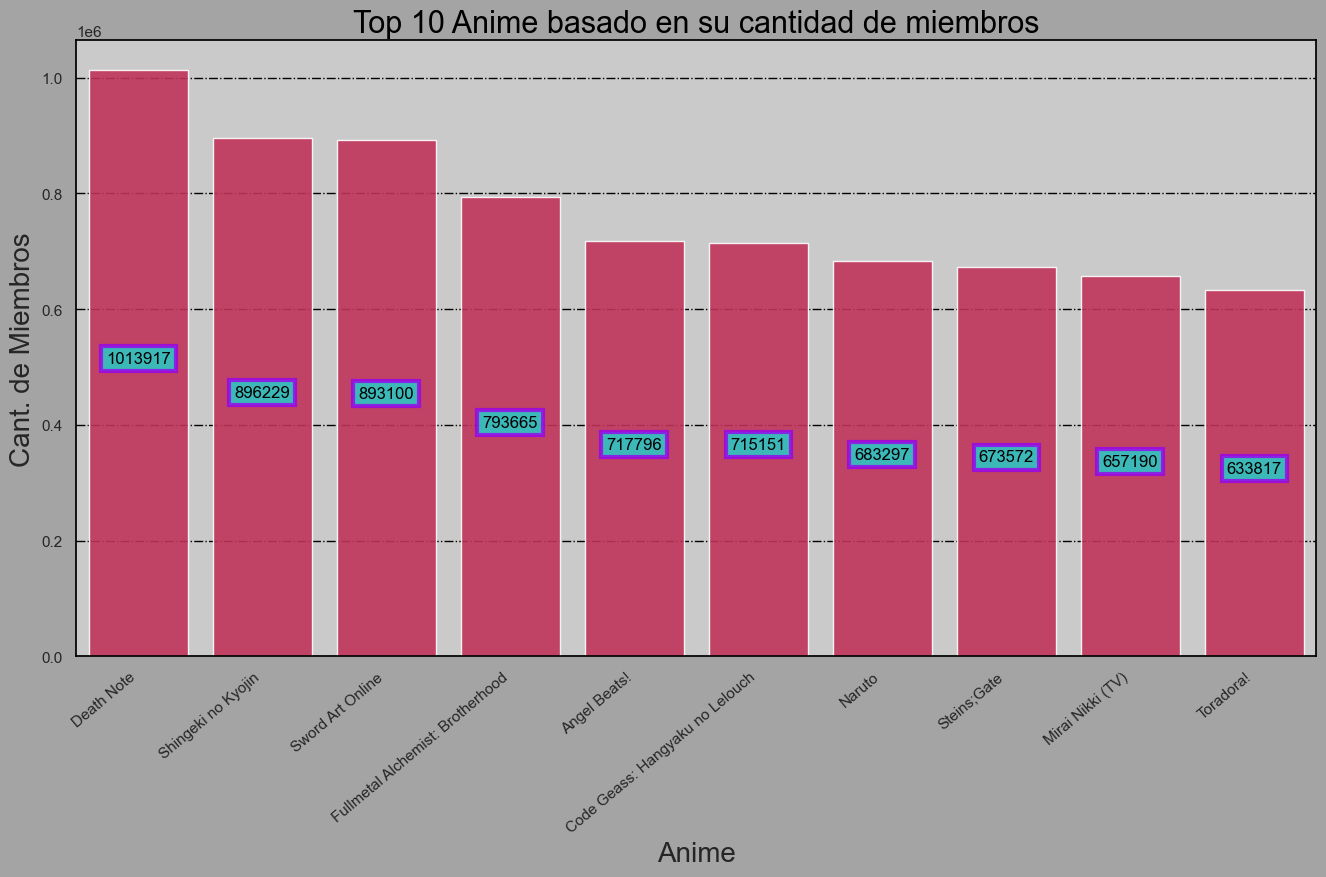

In [7]:
# Ordenamos el top 10
top10_animemembers=anime_cp[['anime_title', 'members']].sort_values(by='members',ascending = False).head(10)

# Gráfica de barras con el top 10 
fig,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers,color='#D61C4E',alpha=0.9)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime basado en su cantidad de miembros',fontsize=22)
ax.set_xlabel('Anime',fontsize=20) 
ax.set_ylabel('Cant. de Miembros', fontsize=20)
addlabels(top10_animemembers.anime_title.values,top10_animemembers.members.values)

**_Conclusión:_**

El podio sigue encabezado por [Death Note](https://es.wikipedia.org/wiki/Death_Note), ahora seguido de [Shingeki no Kyojin](https://es.wikipedia.org/wiki/Shingeki_no_Kyojin). y luego [SOA](https://es.wikipedia.org/wiki/Sword_Art_Online) 

### 📈 Dispersión del Rating
---

a. Rating de websites.

b. Rating de usuarios.

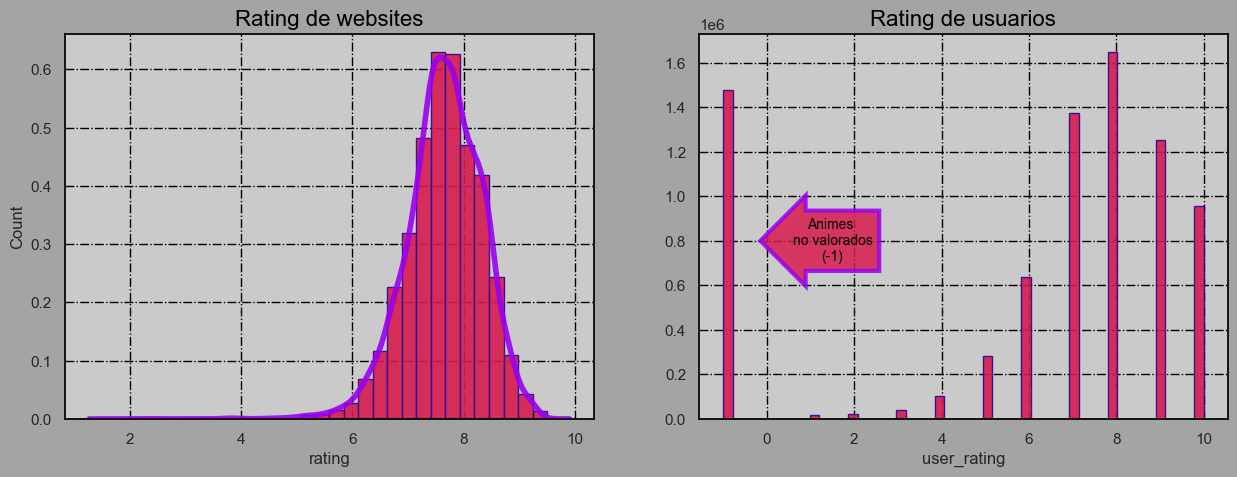

In [8]:
# Gráficas de distribución
# -------------- Estilo de la gráfica -------------- # 
hist_style = {'color':'#D61C4E',
              'edgecolor':'#2A0696',
              'alpha':0.9
             }
kde_style = {'bw':0.2,
             'linestyle': '-',
             'lw': 4,
             'color': '#9900F0',
             'alpha':0.9             
            }
# -------------- Estilo de la gráfica -------------- #
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(15, 5))
# -------------------- Website  -------------------- #
sns.distplot(anime_fulldata['rating'],ax=ax1,
             kde=True,
             bins=30,             
             hist_kws= hist_style,
             kde_kws=kde_style,
             )
ax1.set_ylabel('Count')
ax1.set_title("Rating de websites",fontsize = 16)
# -------------------- Usuarios -------------------- #
sns.distplot(anime_fulldata['user_rating'],ax=ax2,
             kde=False,
             hist_kws=hist_style
             )
ax2.set_title("Rating de usuarios",fontsize = 16)
ax2.text(1.5, 800000, "Animes \nno valorados\n(-1)",
            ha="center", va="center",
            rotation=0, size=10, 
            bbox=dict(boxstyle="larrow,pad=0.5",fc="#D61C4E",ec="#9900F0",lw=3, alpha=0.85))
plt.show()

In [9]:
# Estadísticas de Rating
print("-----------Rating - Websites-----------")
print(anime_fulldata.rating.describe())
print("")
print("-----------Rating - Usuarios-----------")
print(anime_fulldata.user_rating.describe())

-----------Rating - Websites-----------


count    7.813721e+06
mean     7.653127e+00
std      6.730287e-01
min      1.670000e+00
25%      7.270000e+00
50%      7.680000e+00
75%      8.130000e+00
max      9.500000e+00
Name: rating, dtype: float64

-----------Rating - Usuarios-----------
count    7.813727e+06
mean     6.144036e+00
std      3.727796e+00
min     -1.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: user_rating, dtype: float64


**_Conclusiones_**

* _La mayoría de las calificaciones se distribuyen entre 6-10._ 

* _La **moda** de la distribución es alrededor de 7.5-8.0._

* _Ambas distribuciones están sesgadas a la izquierda._

* _Tenemos una calificación de -1 como un valor atípico en la calificación de los usuarios que se puede convertir en NaN_

### 📺 Distribución de Anime por Tipo de Transmisión

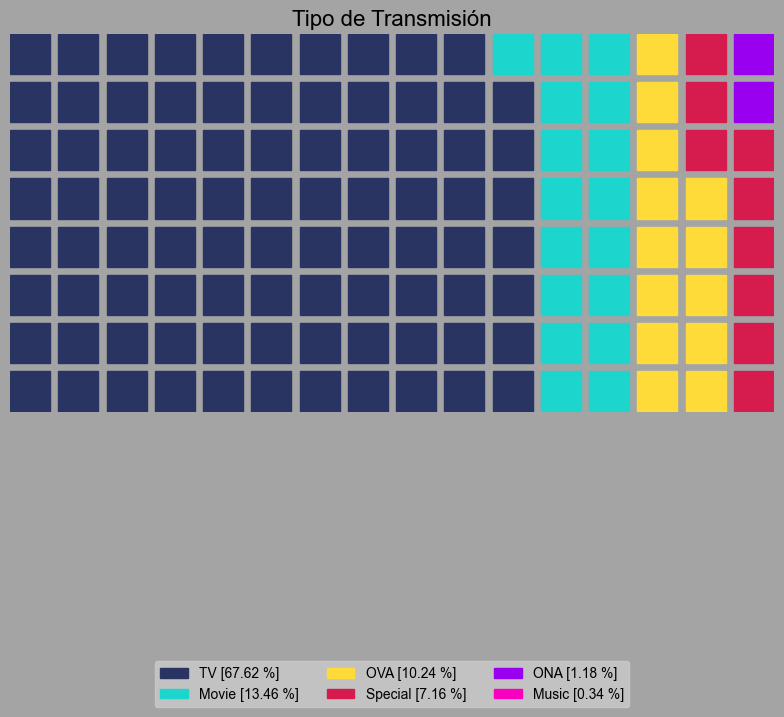

In [10]:
# Importamos la librería
from pywaffle import Waffle

# Confección de gráfica de panqueque
colors = ['#293462', '#1CD6CE', '#FEDB39', '#D61C4E', '#9900F0','#F900BF']

value_type = anime_fulldata['type'].value_counts().values
total_type = sum(value_type)
percent = [round(n/total_type*100,2) for n in value_type]

plot_labels = [f'{i} [{str(j)} %]' for i,j in zip(anime_fulldata['type'].value_counts().index,percent)]

plt.figure(FigureClass=Waffle, figsize=(8,10), rows=8, columns=16,
                 title={'label':'Tipo de Transmisión','fontsize':16},
                 values=value_type,
                 colors=colors,
                 labels=plot_labels,                                  
                 legend={'loc':'lower center', 'bbox_to_anchor': (0.5,-0.8), 
                        'ncol':3, 'fontsize':10})
plt.show()

**_Conclusiones_**

* El **67.6%** de los animes se emitieron para TV, seguido por el **13.5%** en películas.

* El **10.2%** de los animes se transmiten como OVA, que es mayor que ONA (1.18%)

### ☁ Nube de Palabras. Qué géneros son los más consumidos?

Veamos cuál es el género que más consumen los usuarios.

Para ello utilizaremos la librería [wordcloud](https://pypi.org/project/wordcloud/).

In [11]:
# Realizamos una copia de nuestro dataset
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)

# Importamos la librería collections 
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        

# Importación de librería para graficar nube de palabras
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=300, background_color='#502370', colormap='Oranges').generate_from_frequencies(all_genres)
plt.figure(figsize = (10, 10))
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

**_Conclusión_**

Podemos ver que hay muchos animes de género de **_comedia_**... seguidos de **_acción, romance y drama_** en nuestro conjunto de datos.

## 3️⃣ Preparación de los Datos - Data Wrangling

<p align="center">
<img src="https://www.bing.com/th/id/OGC.171650766f341c6e9b809184f2b7ee95?pid=1.7&rurl=https%3a%2f%2fmedia.giphy.com%2fmedia%2fAceKHfcUrqauQ%2fgiphy.gif&ehk=YbCyvB2i9bZ3iHfClVMEsh2dXAtz3JV0jwdMiCZS4%2bQ%3d" height="250px" >
</p>

Previo a insertar nuestros datos al motor de recomendación, debemos ajustarlos y limpiarlos.

---

### 🔁 **Reemplazo de valores**  

Reemplazaremos los valores **-1** en la columna **user_rating** por **Nan**, ya que esto gira en torno a las calificaciones, un usuario que no ha dado ninguna calificación, no ha agregado ningún valor. Por lo tanto serán eliminados de nuestro dataset en un paso posterior.

In [12]:
# Reemplazaremos las valoraciones de usuario NaN con "-1"
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN,2199


### 🕵️ **Análisis de Nulos**  

In [13]:
## Visualizando Nulos
missing_data = anime_feature.isnull()
print(f"Dimensiones: {missing_data.shape} (filas x columnas)")
missing_data.head(5)

Dimensiones: (7813727, 10) (filas x columnas)


,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False


In [14]:
# Identificamos las columnas con datos faltantes y contabilizamos los mismos
for column in missing_data.columns.values.tolist():
    print(f"Columna - '{column}'")
    print (missing_data[column].value_counts())
    print("----------------------------------")  

Columna - 'anime_id'
False    7813727
Name: anime_id, dtype: int64
----------------------------------
Columna - 'anime_title'
False    7813727
Name: anime_title, dtype: int64
----------------------------------
Columna - 'genre'
False    7813617
True         110
Name: genre, dtype: int64
----------------------------------
Columna - 'type'
False    7813723
True           4
Name: type, dtype: int64
----------------------------------
Columna - 'episodes'
False    7813727
Name: episodes, dtype: int64
----------------------------------
Columna - 'rating'
False    7813721
True           6
Name: rating, dtype: int64
----------------------------------
Columna - 'members'
False    7813727
Name: members, dtype: int64
----------------------------------
Columna - 'user_id'
False    7813727
Name: user_id, dtype: int64
----------------------------------
Columna - 'user_rating'
False    6337239
True     1476488
Name: user_rating, dtype: int64
----------------------------------
Columna - 'totalratingco

**Missingno**

---

Utilizamos la librería _[missingno](https://libraries.io/pypi/missingno)_ que ofrece herramientas para la visualización de valores faltantes. Permitiendo con unas simples gráficas, identificar dónde se ubican los valores faltantes en cada variable y ver la correlación que existe entre ellas.

**Matriz de Datos Faltantes** 🧮 

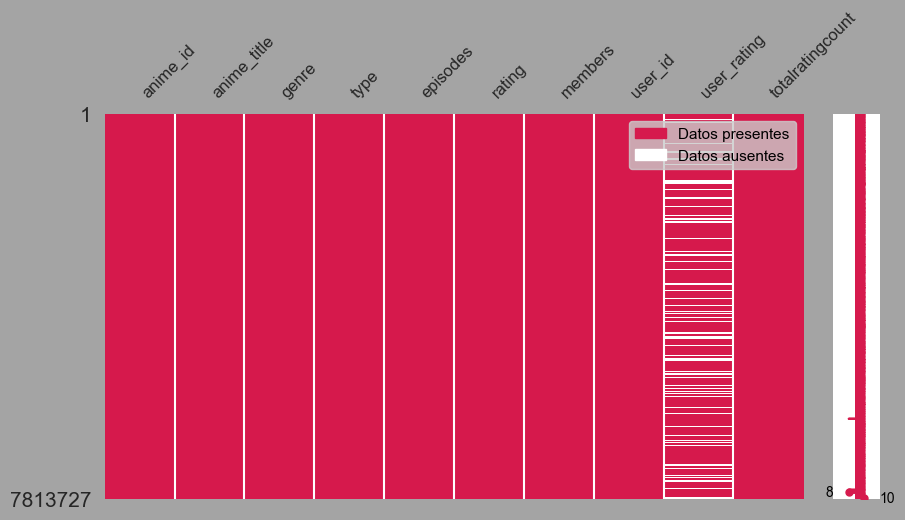

In [15]:
# Chequeamos con nuestra matriz de datos faltantes
import missingno as msno
# msno.bar(anime_feature)
msno.matrix(anime_feature,figsize=(10,5), fontsize=12, color=(0.84, 0.1, 0.3))
gray_patch = mpatches.Patch(color=(0.84, 0.1, 0.3), label='Datos presentes')
white_patch = mpatches.Patch(color='white', label='Datos ausentes ')
plt.legend(handles=[gray_patch, white_patch])
plt.show()

La matriz anterior nos muestra los datos faltantes de nuestras columnas del Dataset. Donde podemos visualizar con facilidad que la columna **user_rating_** es la de mayor cantidad de datos faltantes (aproximadamente **1.46M de datos NaN**)

**Mapa de Calor de Datos Nulos** 🔥

---

El mapa de calor mide la correlación de nulidad. Es decir, qué tan fuertemente la presencia o ausencia de una variable afecta la presencia de otra.

<AxesSubplot:>

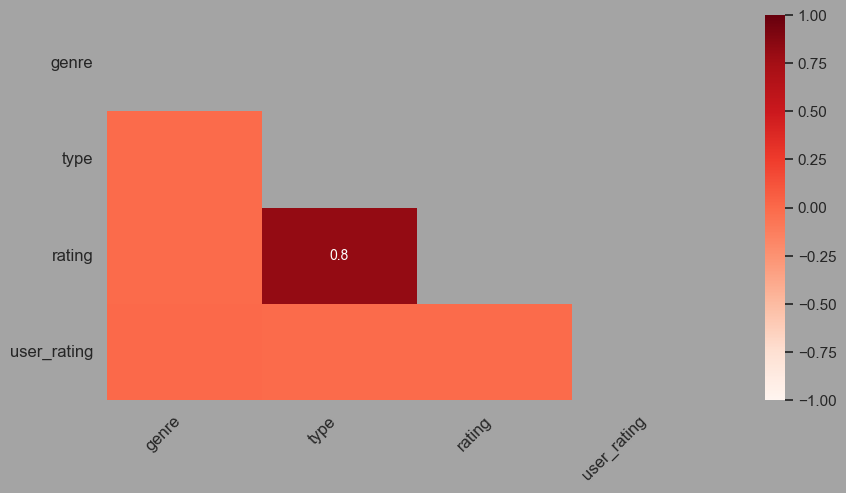

In [16]:
msno.heatmap(anime_feature,figsize=(10,5), fontsize=12,cmap="Reds")

La correlación de nulidad varía de **-1** (_si una variable aparece, la otra definitivamente no_) a **0** (_las variables que aparecen o no aparecen no tienen ningún efecto entre sí_) a **1** (_si aparece una variable, la otra definitivamente también lo hace_).

Otro dato, es que las **variables que siempre están llenas o siempre vacías** _no tienen una correlación significativa_ y, por lo tanto, **se eliminan** silenciosamente **de la visualización** (_'anime_id','episodes',etc_).

Dicho lo anterior, para nuestro dataset, podemos ver que si aparece la variable **type** --> es probable que también lo haga la variable **rating** (y viceversa). Aunque no tenemos una certeza completamente definida, ya que su valor no es igual a 1.

**Dendograma** 🌳

---

El _[dendrograma](https://es.wikipedia.org/wiki/Dendrograma)_ nos permite correlacionar más completamente la finalización de variables, revelando tendencias más profundas que las visibles en el mapa de calor de correlación.

El dendrograma utiliza un algoritmo de agrupamiento jerárquico (_cortesía de scipy_) para agrupar variables entre sí mediante su correlación de nulidad (medida en términos de distancia binaria).

En cada paso del árbol, las variables se dividen en función de qué combinación minimiza la distancia de los grupos restantes. Cuanto más monótono sea el conjunto de variables, más cerca estará su distancia total de cero, y más cerca estará su distancia promedio (el eje y) de cero.

<AxesSubplot:>

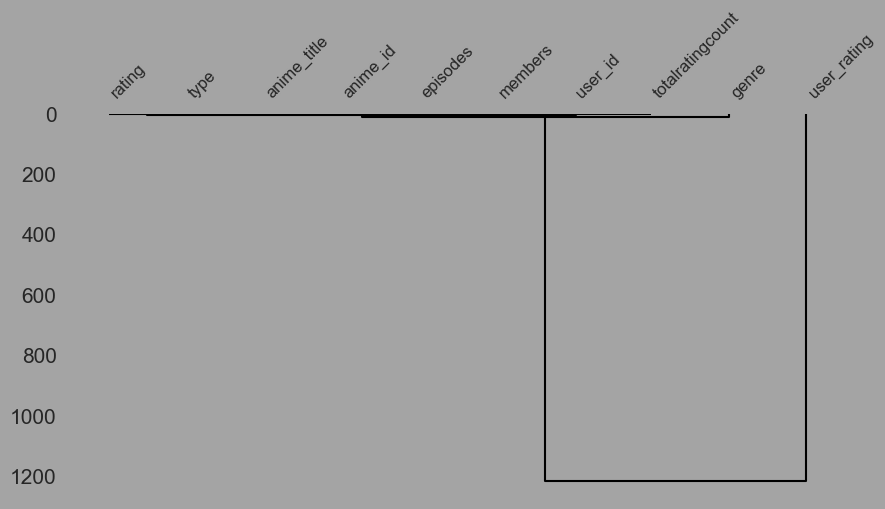

In [17]:
msno.dendrogram(anime_feature,figsize=(10,5), fontsize=12)

Para interpretar este gráfico, debemos leerlo desde una perspectiva de arriba hacia abajo. Las hojas de racimo que se unen entre sí a una distancia de cero predicen completamente la presencia de la otra: una variable siempre puede estar vacía cuando se llena otra, o siempre pueden estar llenas o ambas vacías, y así sucesivamente. 

En el caso de nuestro dataset, podemos ver que hay una relación entre todas las variables, exceptuando a **user_rating**. Aunque esta última posee una relación menor con las variables **anime_id, episodes, members, user_id, totalratingcount y genre.**

### ❌ **Eliminamos los Nulos**  

Eliminamos los datos nulos, sobre todo porque nuestro sistema de recomendación requiere de la información que puedan aportar los usuarios.

In [18]:
# Eliminamos los datos de usuarios que no poseen información de relevancia. 
# Luego verificamos la existencia de NaN en nuestro "nuevo dataset"
print("Resultado previo a la limpieza de filas")
print(anime_feature.isnull().sum())
print("---------------------------------------")
print("Resultado final")
anime_feature = anime_feature.dropna(axis=0, how ='any') 
anime_feature.isnull().sum()

Resultado previo a la limpieza de filas
anime_id                  0
anime_title               0
genre                   110
type                      4
episodes                  0
rating                    6
members                   0
user_id                   0
user_rating         1476488
totalratingcount          0
dtype: int64
---------------------------------------
Resultado final


anime_id            0
anime_title         0
genre               0
type                0
episodes            0
rating              0
members             0
user_id             0
user_rating         0
totalratingcount    0
dtype: int64

### 🔍 👥 **Filtrado por _user_id_** 

Veamos los recuentos de ID de usuario y filtramos en función de dicho valor.

In [19]:
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64

Hay usuarios que han calificado **solo una vez**, incluso si lo han calificado con 5, no puede considerarse un registro valioso para la recomendación. Por lo tanto, consideraremos un mínimo de "n" calificaciones por parte del usuario como valor umbral. 


_Nota_: podremos jugar cambiando el valor del umbral para obtener mejores resultados [_(Link detalles)_](#cell-id).

In [20]:
# contamos únicamente los usuarios que tienen 200 o más valoraciones.
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 100].index)]
# mostramos los ID de usuarios y su cantidad de valoraciones realizadas (de mayor a menor)
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
28796     100
35252     100
45218     100
16540     100
1765      100
Name: user_id, Length: 19949, dtype: int64

### 📐 Creación de **Tabla Dinámica**  


Crearemos una tabla con **títulos de anime** como filas y **user_id** como columnas. Esto nos permitirá crear una [matriz dispersa](https://pfafner.github.io/opt2021/aulas/Aula12.pdf) con la cual podremos utiilizar la _similitud del coseno_

In [21]:
# Tabla Pivot
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
print(f"Tabla de {len(anime_pivot.values)} filas x {len(anime_pivot.columns)} columnas")
anime_pivot.head()

Tabla de 9856 filas x 19949 columnas


user_id,5,7,11,14,17,21,29,38,43,44,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 🧹 Limpieza del **título** del anime

In [22]:
# Extraemos los símbolos que no aportan al título original del anime para mejorar nuestro sistema de recomendación.
# Creamos una función que aplica expresiones regulares para ello.
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    return text

anime_feature['anime_title'] = anime_feature['anime_title'].apply(text_cleaning)
anime_feature

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0,2199
...,...,...,...,...,...,...,...,...,...,...
7813713,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1.0,4
7813716,5543,Under World,Hentai,OVA,1,4.28,183,49503,4.0,4
7813717,5543,Under World,Hentai,OVA,1,4.28,183,58483,1.0,4
7813720,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6.0,3


## 4️⃣ Construcción de modelo de recomendación 

1. **Similitud del coseno** utilizando _knn_

\begin{equation}
sim(A,B) = cos(Ɵ) = A.B / |A|.|B|
\end{equation}


La similitud del coseno es una métrica utilizada para medir cuán similares son los documentos, independientemente de su tamaño. 
Matemáticamente, mide el coseno del ángulo entre dos vectores proyectados en un espacio multidimensional. La similitud del coseno es ventajosa porque incluso si los dos documentos similares están muy separados por la distancia euclidiana (debido al tamaño del documento), es probable que aún estén orientados más juntos. 
Cuanto menor sea el ángulo (**coseno 0° = 1**), mayor será la similitud del coseno.

<p align="center">
<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/soft-cosine-1024x489.png"
height="220">
</p>

---

2. El **Filtrado colaborativo** (FC) es una técnica utilizada por algunos sistemas recomendadores. En general, el filtrado colaborativo es el proceso de filtrado de información o modelos, que usa técnicas que implican la colaboración entre múltiples agentes, fuentes de datos, etc.

<p align="center">
<img src="https://fundacionctic.org/sites/default/files/inline-images/3_4.png"
height="250">
</p>

---


### 🌌 Recomendación por similitud de coseno
---

En primer instancia crearemos la matriz dispersa, con el método CSR (Compressed Sparse Row) que nos brinda la librería _[Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)_

<p align="center">
<img src="https://matteding.github.io/images/csr.gif">
</p>

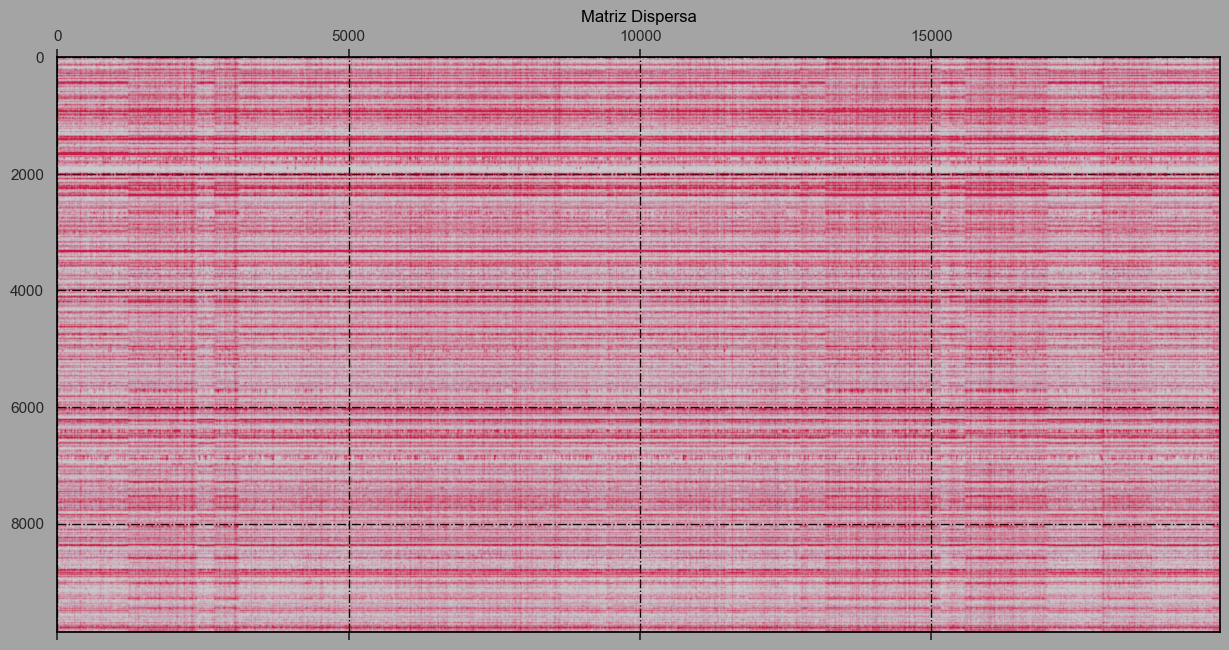

In [23]:
# Importamos la librería
from scipy.sparse import csr_matrix
# Generamos la matriz
anime_matrix = csr_matrix(anime_pivot.values)

# Graficamos la matriz dispersa
plt.figure(figsize=(15,20))
plt.spy(anime_matrix, markersize=0.005,precision=0.0001,color='#D61C4E')
plt.title('Matriz Dispersa')
plt.show()

Luego implementaremos una búsqueda por vecinos cercanos, con el uso de la librería _[ScikitLearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html)_.


<p align="center">
<img src="https://images.deepai.org/glossary-terms/b567c1b3e74b4457bb7cf9841ca71a1b/nearest.jpg">
</p>

In [24]:
# Importamos la librería
from sklearn.neighbors import NearestNeighbors

# Instanciamos el modelo - utilizamos similitud del coseno para este tipo de Dataset
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Con el método **kneighbors** de nuestro modelo, encontraremos los vecinos (_más cercanos_) de un punto de nuestra matriz dispersa. El método nos devuelve la **distancia** e **indice** de los mencionados vecinos, aplicando para ello la similitud del coseno como se mencionara anteriormente.

In [25]:
# 1-Elegimos un Anime al azar...
# query_anime = np.random.choice(anime_pivot.shape[0])
#----------------------------------------------------#
# 2-Si deseamos probar manualmente, animes conocidos por su nombre
query_anime = 'Shingeki no Kyojin'
# query_anime = 'Sword Art Online' 
# query_anime = 'Tokyo Ghoul'
# query_anime = 'Dragon Ball' 

#----------------------------------------------------#
# Realizamos la búsqueda
if type(query_anime)==str:
  # si ingresamos el nombre del anime
  distances, indices = model_knn.kneighbors(anime_pivot[anime_pivot.index.values == query_anime].values.reshape(1,-1), n_neighbors = 6)
else:
  # en caso de que optemos por la opción de busqueda arbitraria, por 'anime_id'
  distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_anime,:].values.reshape(1, -1), n_neighbors = 6)

# Resutados de la busqueda
print(f"Anime seleccionado: '{anime_pivot.index[indices.flatten()[0]]}'")

Anime seleccionado: 'Shingeki no Kyojin'


In [26]:
# Resultados obtenidos de la búsqueda 👍 
for i in range(0, len(distances.flatten())):
  if i == 0:
      print('Recomendaciones para "{0}" - ID: {1}\n'.format(anime_pivot.index[indices.flatten()[0]],indices.flatten()[0]))
  else:
      print('{0}: {1} - [{2}], con una distancia de {3}.'.format(i, anime_pivot.index[indices.flatten()[i]], indices.flatten()[i], round(distances.flatten()[i],4)))

Recomendaciones para "Shingeki no Kyojin" - ID: 7841

1: Sword Art Online - [8366], con una distancia de 0.2121.
2: No Game No Life - [6210], con una distancia de 0.2752.
3: Tokyo Ghoul - [8838], con una distancia de 0.2767.
4: Mirai Nikki (TV) - [5630], con una distancia de 0.2859.
5: Death Note - [1665], con una distancia de 0.2891.


---
<a name="cell-id"></a>
#### 🔍🗃️ Análisis de los datos relevados para diferentes nros de filtrado de user_id

<p align="center">
<img src="https://media1.tenor.com/images/3a50af2c2e80cd74c13773b3a03b548e/tenor.gif?itemid=9449608">
</p>

In [27]:
# Carga datos (Excel)
excel_path = 'Docs/Relevo fitro_user_id.xlsx'
df_userId_filter = pd.read_excel(excel_path)
df_userId_filter

,Busqueda,Filtro # valoraciones,Anime Fuente,Id Anime Fuente,Recomendación #1,Id #1,Distancia #1,Recomendación #2,Id #2,Distancia #2,Recomendación #3,Id #3,Distancia #3,Recomendación #4,Id #4,Distancia #4,Recomendación #5,Id #5,Distancia #5
0,1,40,Dragon Ball,1990,Dragon Ball Z,2001,0.2114,Dragon Ball GT,1991,0.2689,Naruto,6027,0.5214,Death Note,1668,0.5302,Fullmetal Alchemist,2359,0.5602
1,2,40,Shingeki no Kyojin,7856,Sword Art Online,8384,0.2609,Tokyo Ghoul,8857,0.3283,No Game No Life,6224,0.3431,Mirai Nikki,5642,0.3464,Death Note,1668,0.3487
2,3,50,Dragon Ball,1989,Dragon Ball Z,2000,0.2070,Dragon Ball GT,1990,0.2659,Naruto,6025,0.5096,Death Note,1667,0.5190,Fullmetal Alchemist,2357,0.5495
3,4,50,Shingeki no Kyojin,7854,Sword Art Online,8382,0.2503,Tokyo Ghoul,8855,0.3168,No Game No Life,6222,0.3287,Mirai Nikki,5640,0.3324,Death Note,1667,0.3351
4,5,100,Dragon Ball,1986,Dragon Ball Z,1997,0.1864,Dragon Ball GT,1987,0.2479,Naruto,6013,0.4695,Death Note,1665,0.4752,Fullmetal Alchemist,2354,0.5073
5,6,100,Shingeki no Kyojin,7841,Sword Art Online,8366,0.2121,No Game No Life,6210,0.2752,Tokyo Ghoul,8838,0.2767,Mirai Nikki,5630,0.2859,Death Note,1665,0.2891
6,7,150,Dragon Ball,1979,Dragon Ball Z,1990,0.1693,Dragon Ball GT,1980,0.2355,Naruto,5998,0.4377,Death Note,1659,0.4471,Fullmetal Alchemist,2346,0.4737
7,8,150,Shingeki no Kyojin,7822,Sword Art Online,8346,0.1898,No Game No Life,6195,0.2454,Tokyo Ghoul,8814,0.2523,Mirai Nikki,5615,0.2552,Angel Beats!,351,0.2576
8,9,200,Dragon Ball,1974,Dragon Ball Z,1985,0.1559,Dragon Ball GT,1980,0.2245,Naruto,5976,0.4162,Death Note,1654,0.4205,Fullmetal Alchemist,2341,0.4476
9,10,200,Shingeki no Kyojin,7790,Sword Art Online,8306,0.1709,No Game No Life,6172,0.2194,Angel Beats!,351,0.2278,Tokyo Ghoul,8772,0.2314,Mirai Nikki,5595,0.2324


El análisis de la tabla anterior tiene como objetivo definir un punto de número de valoraciones mínimas de usuarios, para un óptimo funcionamiento del modelo con la base de datos con la cual estamos trabajando.

In [28]:
ani_df = df_userId_filter.copy()

def break_point_search(n_reviews:int, anime_fuente:str, vline:bool):

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(20, 8))

    for i in range(1,6):
        if i == 1:
            eval(f"ani_df.pivot_table('Distancia #{i}', index='Filtro # valoraciones', columns='Anime Fuente',).plot(ax=ax{i},color=['#1CD6CE','#FEDB39'], lw=4, ylabel='Distancia con respecto al anime de búsqueda')")
        else:
            eval(f"ani_df.pivot_table('Distancia #{i}', index='Filtro # valoraciones', columns='Anime Fuente').plot(ax=ax{i},color=['#1CD6CE','#FEDB39'], lw=4)")
        
        # lineas verticales    
        if vline:        
            eval(f"ax{i}.vlines(x=n_reviews,ymin=0,ymax=ani_df['Distancia #{i}'].max()*0.95,linestyle='-.',lw=2.5,colors='#9900F0')")
            eval(f"ax{i}.text(n_reviews*1.25,y=0.08,s='{n_reviews} valoraciones',fontsize=12,color='#9900F0',bbox=dict(boxstyle='square,pad=0.3',fc='#1CD6CE',ec='#9900F0',lw=3, alpha=0.8))")        
        

    d_min = ani_df[(ani_df['Filtro # valoraciones'] == ani_df['Filtro # valoraciones'].max()) & (ani_df['Anime Fuente'] == anime_fuente)].values[0,6]         # distancia #1 para 40 valoraciones
    d_max = ani_df[(ani_df['Filtro # valoraciones'] == ani_df['Filtro # valoraciones'].min()) & (ani_df['Anime Fuente'] == anime_fuente)].values[0,6]         # distancia #1 para 500 valoraciones
    d_mid = ani_df[(ani_df['Filtro # valoraciones'] == n_reviews) & (ani_df['Anime Fuente'] == anime_fuente)].values[0,6]                                     # distancia #1 para "n_reviews" valoraciones


    dif_perc_inf = abs(d_min-d_mid)/d_mid*100
    dif_perc_sup = abs(d_max-d_min)/d_mid*100

    print('Resultados: ')
    print('---------------------------------------------------------------------')
    print(f'd_min: {d_min:0.2f} - valor de distancia (por similitud de coseno) mínima. ')
    print(f'd_mid: {d_mid:0.2f} - valor de distancia (por similitud de coseno) para {n_reviews} reviews.')
    print(f'd_max: {d_max:0.2f} - valor de distancia (por similitud de coseno) máxima.')
    print('---------------------------------------------------------------------\n')
    print(f"Diferencia porcentual con respecto al pto. de corte (con {n_reviews} valoraciones mín.), desde limite inf.({ani_df['Filtro # valoraciones'].min()} valoraciones mín.): {dif_perc_inf:0.3f} %.")
    print(f"Diferencia porcentual con respecto al pto. de corte (con {n_reviews} valoraciones mín.), desde limite sup.({ani_df['Filtro # valoraciones'].max()} valoraciones mín.): {dif_perc_sup:0.3f} %.")

In [29]:
# Función para visualizar distintos escenarios (filtrado por valoraciones mínimas).
widgets.interact(break_point_search,
                        n_reviews=widgets.Dropdown(options=[40,50,100,150,200,250,500],value=100,disabled=False),
                        anime_fuente=widgets.Dropdown(options=['Dragon Ball','Shingeki no Kyojin'],value='Shingeki no Kyojin'),
                        vline=True,                                               
                        )

interactive(children=(Dropdown(description='n_reviews', index=2, options=(40, 50, 100, 150, 200, 250, 500), va…

<function __main__.break_point_search(n_reviews: int, anime_fuente: str, vline: bool)>

Se aprecia que para un **filtro de 200 valoraciones** mínimas por usuario, cambia la pendiente de las curvas en ambos animes.

A continuación se muestra una Tabla, para visualizar los resultados obtenidos con el modelo **kkn** _[cosine similarity]_. En este caso, se confecciona con los resultados sólo de **Shingeki no Kiojin**, aunque el análisis es similar para el caso de **Dragon Ball**.

In [30]:
excel_df = df_userId_filter.copy()
# Filtramos por uno de los animes para mejorar la visualización de las tablas 
# y optimizar la comparativa de las distancias en función del nro de valoraciones mínimas de los usuarios
excel_df = excel_df.loc[excel_df['Anime Fuente']=='Shingeki no Kyojin',['Filtro # valoraciones','Anime Fuente',
                        'Recomendación #1','Distancia #1',
                        'Recomendación #2','Distancia #2',
                        'Recomendación #3','Distancia #3',
                        'Recomendación #4','Distancia #4',
                        'Recomendación #5','Distancia #5',
                        ]]
txt='Distancia #'
numeric_columns = [txt+str(i) for i in range(1,6)]
columns_formatters = {txt+str(i):'{:0.3f}' for i in range(1,6)}
excel_df.style\
    .bar(color='#D61C4E',subset=numeric_columns,align='zero')\
    .format(columns_formatters)    

,Filtro # valoraciones,Anime Fuente,Recomendación #1,Distancia #1,Recomendación #2,Distancia #2,Recomendación #3,Distancia #3,Recomendación #4,Distancia #4,Recomendación #5,Distancia #5
1,40,Shingeki no Kyojin,Sword Art Online,0.261,Tokyo Ghoul,0.328,No Game No Life,0.343,Mirai Nikki,0.346,Death Note,0.349
3,50,Shingeki no Kyojin,Sword Art Online,0.250,Tokyo Ghoul,0.317,No Game No Life,0.329,Mirai Nikki,0.332,Death Note,0.335
5,100,Shingeki no Kyojin,Sword Art Online,0.212,No Game No Life,0.275,Tokyo Ghoul,0.277,Mirai Nikki,0.286,Death Note,0.289
7,150,Shingeki no Kyojin,Sword Art Online,0.190,No Game No Life,0.245,Tokyo Ghoul,0.252,Mirai Nikki,0.255,Angel Beats!,0.258
9,200,Shingeki no Kyojin,Sword Art Online,0.171,No Game No Life,0.219,Angel Beats!,0.228,Tokyo Ghoul,0.231,Mirai Nikki,0.232
11,250,Shingeki no Kyojin,Sword Art Online,0.163,No Game No Life,0.203,Angel Beats!,0.207,Tokyo Ghoul,0.217,Mirai Nikki,0.217
13,500,Shingeki no Kyojin,Sword Art Online,0.134,Angel Beats!,0.149,No Game No Life,0.163,Hataraku Maou-sama!,0.164,Steins;Gate,0.167


**_Conclusiones_**

Podemos mencionar que si bien **a mayor cantidad de valoraciones** de usuarios (filtrado más robusto), los resultados de las distancias **baja en porcentajes considerables**. El problema es que, en tal condición, también estamos sesgando posibles animes a ser recomendados, que no cuenten con la suficiente cantidad de valoraciones. Esto provocaría un **sesgo importante en nuestras recomendaciones**.

Por lo dicho anteriormente, se mantendrá el filtro de valoraciones mínimas entre **100** y **150**. Ya que las distancias son menores que en los casos de *40 y 50 valoraciones mínimas* (por la cantidad de datos resultantos, es imposible bajar el nro a menos de 40 valoraciones, los recuros de procesamiento impiden que corra en dicha condición), y además como se mencionara previamente, evitamos provocar un sesgo considerable en las recomendaciones.

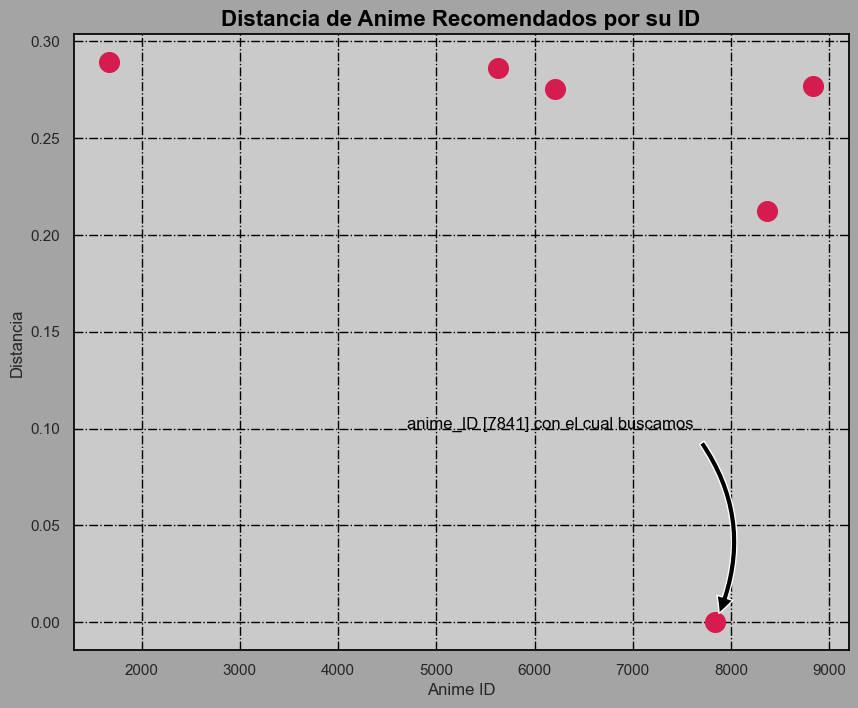

In [31]:
# Dispersión para visualizar la recomendación e ID's de los animes
fig, ax = plt.subplots(figsize=(10,8))
x = indices.flatten()
y = distances.flatten()
ax.scatter(x, y, s=200, color='#D61C4E')
fontdict = {'fontsize': 16,
            'weight': 'bold'}

ax.set_title('Distancia de Anime Recomendados por su ID',fontdict=fontdict)
ax.set_xlabel('Anime ID')
ax.set_ylabel('Distancia')
text = f"anime_ID [{x[0]}] con el cual buscamos"
if x[0] > 6500:
  x_id = 0.6
else:
  x_id = 1.1
ax.annotate(text, 
            xy=(x[0], y[0]),
            xytext=(x[0]*x_id, y[0]+0.1),
            fontsize=12,
            arrowprops=dict(facecolor='black', shrink=0.05, connectionstyle="arc3,rad=-0.3"))
ax.grid(True)

Otra visualización de nuestros resultados obtenidos con el modelo "knn"

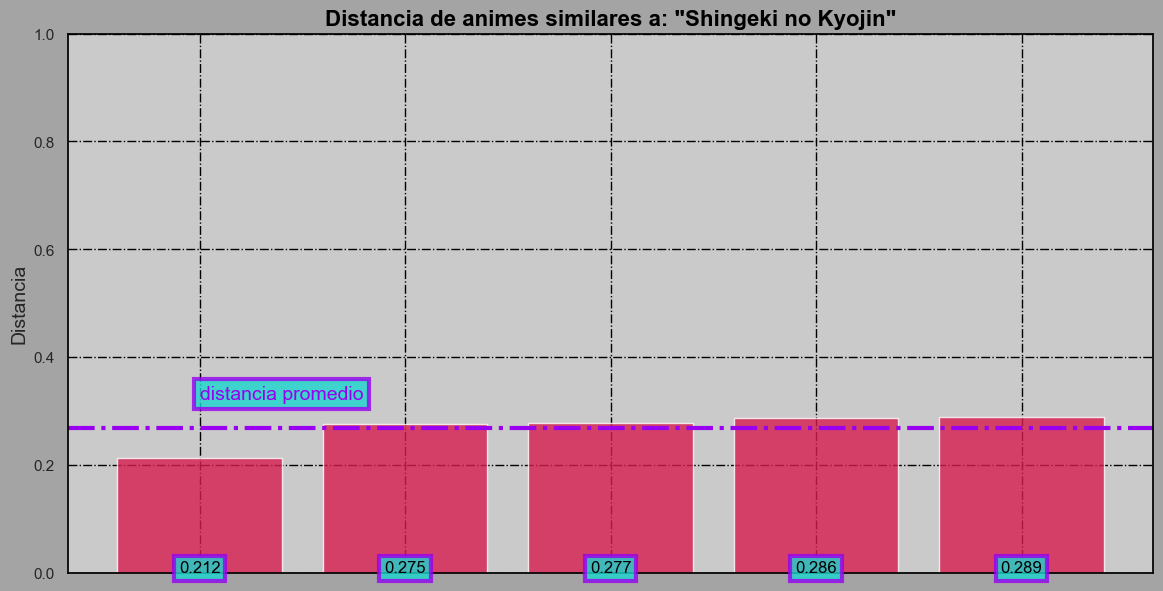

In [32]:
# Gráfica de barra para visualizar la recomendación
fig, ax = plt.subplots(figsize=(14,7))
x = [anime_pivot.index[i] for i in indices.flatten()] 
y = np.delete(np.around(distances.flatten(),3),0)     # nos quedamos con los resultados de recomendacion y excluimos el anime de búsqueda.
x_busqueda = x.pop(0)                                 # guardamos el primer elemento y lo eliminamos, ya que solo tomamos los animes obtenidos como resultado del modelo.

ax.bar(x, y, color='#D61C4E', alpha=0.8)
fontdict = {'fontsize': 16,
            'weight': 'bold'}

ax.set_title('Distancia de animes similares a: "{}"'.format(x_busqueda),fontdict=fontdict)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize = 14)
ax.set_ylabel('Distancia', fontsize = 14)
ax.axhline(y=y.mean(), color='#9900F0', linestyle='-.', linewidth=3) # se grafica recta horizontal con el promedio de las distancias de los animes recomendados por el modelo
ax.text(x=x[0],y=y.mean()*1.2,s='distancia promedio',
        color='#9900F0',
        fontsize=14,
        bbox=dict(boxstyle="square,pad=0.3",fc="#1CD6CE",ec="#9900F0",lw=3, alpha=0.8))
ax.set_ylim([0, 1])
addlabels(x,y)

De las dos gráficas anteriores, vemos que en la de dispersión, con este modelo obtenemos los anime ID's y la distancia de estos al anime de búsqueda. En la de barras, mostramos en primer instancia el anime de búsqueda y luego le siguen las recomendaciones, en orden ascendente por su valor de distancia.

---

Finalmente, como ya se mencionó, los **resultados** de nuestras **búsquedas** dependerán entre otras cosas, del *filtro de usuarios* que utilicemos (a medida que filtremos por usuarios que han valorado a mayor cantidad de animes, nuestras recomendaciones mejoraran en cuanto a la reducción de distancia, pero provocarmeos un **sesgo mayor**). Como en el caso de 500 valoraciones, donde los resultados en el caso de **Shingeki no Kyojin** cambiaron bastante si lo comparamos con el caso de 250 valoraciones mínimas (tantos en la reducción de distancias, como en los propios animes).

### 📡 Recomendación por Filtrado Colaborativo

Basado en contenido, intentaremos armar un modelo de recomendación de animes...el cual nos brindará mejores resultados y además evitaremos el sesgo de datos. Es decir, este método sería el más **óptimo** para la tarea.

El filtrado basado en contenido, también conocido como **filtrado cognitivo**, recomienda elementos basados en una *comparación entre el contenido de los elementos y un perfil de usuario*. El contenido de cada elemento se representa como un conjunto de *descriptores o términos*, normalmente las **palabras** que aparecen en un documento.

Un recomendador basado en contenido trabaja con datos que el usuario proporciona, ya sea explícitamente (calificación) o implícitamente (haciendo clic en un enlace). A partir de esos datos, se genera un perfil de usuario, que luego se utiliza para hacer sugerencias al usuario. A medida que el usuario proporciona más entradas o realiza acciones sobre las recomendaciones, el motor se vuelve cada vez más preciso.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1EElAH0THFUidrXXjGJTZ1k0c5JzS23B8">
</p>

Entonces, para poder implementar el modelo, necesitaremos contabilizar los términos y ver qué peso tienen estos,  y mediante **"TF-IDF"** (de sus siglas en inglés, _Term Frequency-Inverse Document Frequency_) poremos hacerlo.

#### [TF-IDF](https://es.wikipedia.org/wiki/Tf-idf)
---

\begin{equation}
W_x,_y = tf_x,_y . log(N/df_x)
\end{equation}

*Donde*:

\begin{equation}tf_x,_y \end{equation} *frecuencia  de  x en y*

\begin{equation}df_x,_y \end{equation} *número de documentos que contienen x*

\begin{equation}N \end{equation} *número total de documentos*

---

Nos valdremos de la función **[TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)** de scikit-learn. Una explicación muy sencilla de como funciona, sería la siguiente:

Imaginemos que *deseamos contar cuántas veces aparece cada palabra en un cuento* que hemos leído. Si hiciéramos esto manualmente, tendríamos que leer el cuento varias veces, contar cada palabra y anotarlas todas en una lista.

La función **TfidfVectorizer** es como una ayuda para hacer esto más fácilmente. En lugar de tener que hacerlo manualmente, las palabras por nosotros. Pero eso no es todo, también realizará el **"tf-idf"**.

La parte _"tf"_ de _"tf-idf"_ significa **"frecuencia de término"** y cuenta cuántas veces aparece cada palabra en el cuento. La parte _"idf"_ significa **"frecuencia inversa de documento"** y mide qué tan común o raro es una palabra en un conjunto de documentos. Juntas, estas medidas nos dan una idea de la importancia de cada palabra en el cuento.

En resumen, la función *TfidfVectorizer* de *scikit learn* cuenta cuántas veces aparece cada palabra y mide la importancia de cada palabra utilizand _"tf-idf"_. 

In [48]:
# Utilizaremos el género como filtro de contenido
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 3),
                    stop_words = 'english')

anime_colab_fil = anime_data.copy()
anime_colab_fil['name'] = anime_colab_fil['name'].apply(text_cleaning)  
# Rellenamos los NaNs con strings vacíos
anime_colab_fil['genre'] = anime_colab_fil['genre'].fillna('')
genres_str = anime_colab_fil['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

# Visualizamos la matrix resultante
print(f"Dimensiones de la mariz: {tfv_matrix.shape} - (filas x columnas)")

Dimensiones de la mariz: (12294, 1554) - (filas x columnas)


Métricas (ajustar textos/fórmulas/etc)
En lo que sige explicar (y mostrar) fórmula de [kernel sigmoide](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.sigmoid_kernel.html#sklearn.metrics.pairwise.sigmoid_kernel)

\begin{equation}
k(x,y) = tanh(\gamma x^Ty+c_0)
\end{equation}


In [49]:
from sklearn.metrics.pairwise import sigmoid_kernel
# Núcleo sigmoide
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

El resultado que devuelve es una matriz simétrica de pares de muestras, donde cada elemento de la matriz representa la similitud entre dos muestras en función del kernel sigmoide.

El resultado de la función _**sigmoid_kernel**_ es una matriz n x m, donde n es el número de muestras en el primer conjunto y m es el número de muestras en el segundo conjunto. Cada elemento (i, j) de la matriz resultante representa la similitud entre la i-ésima muestra del primer conjunto y la j-ésima muestra del segundo conjunto, calculada utilizando el _kernel sigmoide_.

>Es importante destacar que la función _sigmoid_kernel_ devuelve una **matriz densa**, lo que significa que todos los pares de muestras tienen un valor de similitud correspondiente en la matriz resultante. _Esto puede generar matrices de gran tamaño si se utilizan conjuntos de datos grandes, por lo que es importante tenerlo en cuenta al usar esta función_.

In [44]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

In [50]:
# Función para buscar recomendaciones
def give_rec(title, sig=sig):
    
    # Verificamos existencia de anime
    if title in indices:
        # Obtención del índice correspondiente al anime de búsqueda
        idx = indices[title]

        # Obtención de la similitud de "scores"
        sig_scores = list(enumerate(sig[idx]))

        # Ordenamiento
        sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

        # Scores de los 10 más similares - tomamos 11 y eliminamos luego la 1er recomendación (ya que es el propio anime de búsqueda)
        sig_scores = sig_scores[1:12]

        # Indexado
        anime_indices = [i[0] for i in sig_scores]

        # Devuelve df con Top 10 más similares - en este paso eliminamos el primer resultado (el propio anime de búsqueda)
        df_result = pd.DataFrame({'Anime_name': anime_colab_fil['name'].iloc[anime_indices].values,
                                  'Rating': anime_colab_fil['rating'].iloc[anime_indices].values}).drop(0)
        # display(df_result)
        return df_result
    
    # en caso de que no exista el anime buscado
    else:
        return pd.DataFrame()   # creamos un dataframe vacío

In [51]:
# Armemos una Función para visualizar las recomendaciones
def plot_recommendation(search_anime):
    # Si el anime existe, es decir que el dataframe no está vacío, visualizaremos las recomendaciones
    if not give_rec(search_anime).empty:
        df_r=give_rec(search_anime).sort_values(by='Rating',ascending=False)   # ordenamos los animes en función de su "Rating"
        fig, ax = plt.subplots(figsize=(10,7))
        sns.barplot(data=df_r,y=df_r.Anime_name,x=df_r.Rating,orient='h',color='#D61C4E',alpha=0.85,ax=ax)
        ax.set_title(f'Recomendaciones para: {search_anime}',
                    fontdict={'size':18,'style':'italic','weight':'bold'})
        ax.set_xlabel('Rating',fontdict={'size':15})
        ax.set_ylabel('')
        ax.set_yticklabels(df_r.Anime_name,fontdict={'size':12})

        # boxs con valor de Rating
        x = df_r.Rating.index
        y = df_r.Rating.values
        for i in range(len(x)):
            ax.text(0.9*y[i],i,y[i], ha = 'center',va="center",
                    bbox=dict(boxstyle='square,pad=0.3',fc='#1CD6CE',ec='#9900F0',lw=2, alpha=0.8))        
        plt.show()
    
    # en caso de que no exista el anime
    else:
        if search_anime == '':
            print(f"Prueba con un anime, rellenando el campo de texto de arriba.")
        else:
            print(f"El anime {search_anime} no existe, intenta nuevamente.")

In [57]:
widgets.interact(plot_recommendation,
                 search_anime=widgets.Text(value='',
                                           placeholder='Ingresa un Anime (ej. One Piece, Death Note, Sword Art Online, Dragon Ball, etc)',
                                           description='Buscar para: ',
                                           disabled=False,
                                           layout = widgets.Layout(width='60%',
                                                                alig_items='stretch',
                                                                border='3px solid #D61C4E',                                                                
                                                                display='flex')
                                           ))


interactive(children=(Text(value='', description='Buscar para: ', layout=Layout(border_bottom='3px solid #D61C…

<function __main__.plot_recommendation(search_anime)>